In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import Tensor
from torch.distributions import Distribution

In [2]:
def beta_basis(order: int) -> Distribution:
    """
    Returns a Beta distribution with the specified order.
    """
    alpha = torch.arange(1, order + 2, dtype=torch.float32)
    beta = torch.arange(order + 1, 0, -1, dtype=torch.float32)
    return torch.distributions.Beta(alpha, beta)

In [3]:
order = 10
basis = beta_basis(order)

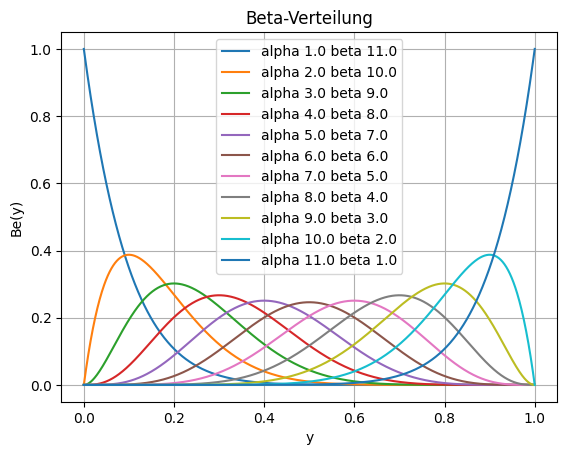

In [4]:
x = torch.linspace(0, 1, 1000).reshape(-1, 1)
y = basis.log_prob(x).exp()
y = y / y.max()
y = y.numpy()

alpha = torch.arange(1, order + 2, dtype=torch.float32)
beta = torch.arange(order + 1, 0, -1, dtype=torch.float32)

for i in range(y.shape[1]):
  plt.plot(x.numpy(), y[:, i], label=f'alpha {alpha[i]} beta {beta[i]}')
plt.legend()
plt.title('Beta-Verteilung')
plt.xlabel('y')
plt.ylabel('Be(y)')
plt.grid()
plt.show()

In [5]:
def bernstein_poly(x: Tensor, theta: Tensor, basis: Distribution):
    """Compute the Bernstein polynomial of degree n at x."""
    b = basis.log_prob(x.unsqueeze(-1)).exp()
    y = torch.mean(b * theta, dim=-1)
    return y

In [6]:
def visualize_bernstein_poly(theta: Tensor, basis: Distribution, title: str = 'Bernstein-Polynom'):
    """Visualize the Bernstein polynomial."""
    x = torch.linspace(0, 1, 1000).reshape(-1, 1)
    y = bernstein_poly(x, theta, basis).numpy()
    y = y / y.max()
    
    plt.plot(x.numpy(), y)
    plt.title(title)
    plt.xlabel('y')
    plt.ylabel('h(y|x)')
    plt.grid()
    plt.show()

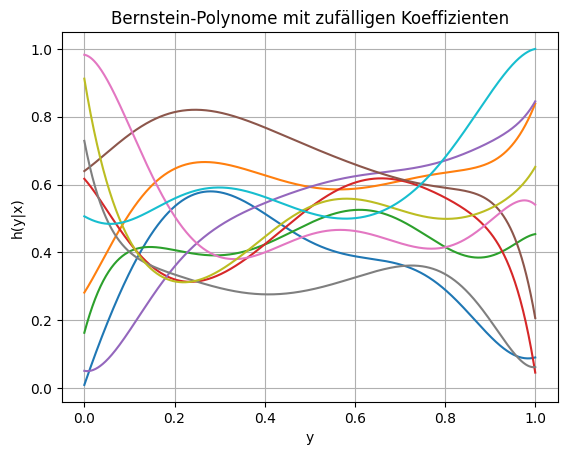

In [7]:
theta = torch.rand(10, order + 1)
visualize_bernstein_poly(theta, basis, title='Bernstein-Polynome mit zufälligen Koeffizienten')

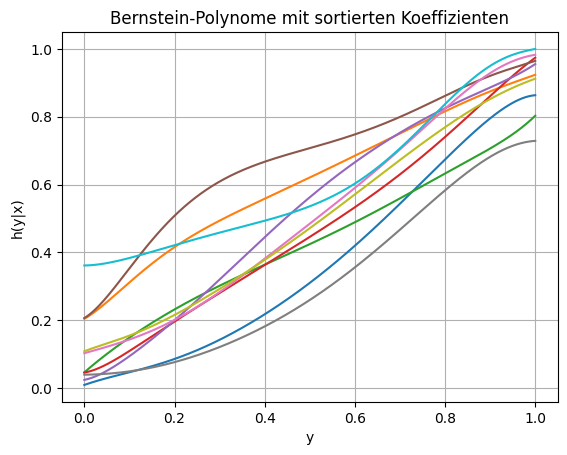

In [8]:
theta_sorted = torch.sort(theta, dim=-1).values
visualize_bernstein_poly(theta_sorted, basis, 'Bernstein-Polynome mit sortierten Koeffizienten')

In [9]:
def to_theta(theta: Tensor) -> Tensor:
    """Convert theta to [theta_0, theta_0 + exp(theta_1), ..., theta_n-1 + exp(theta_n)]"""
    theta_0 = theta[:, :1]
    theta_exp = torch.nn.functional.softplus(theta[:, 1:])
    theta = torch.cat([theta_0, theta_exp], dim=-1)
    theta = torch.cumsum(theta, dim=-1)
    return theta

In [10]:
theta = torch.randn(1, 10)
print(theta)
theta = to_theta(theta)
print(theta)

tensor([[ 0.0892, -1.0805,  0.1768, -0.6761,  0.2644, -1.1751,  0.9006,  0.3094,
          0.7617, -1.3779]])
tensor([[0.0892, 0.3814, 1.1669, 1.5781, 2.4121, 2.6812, 3.9228, 4.7826, 5.9274,
         6.1523]])


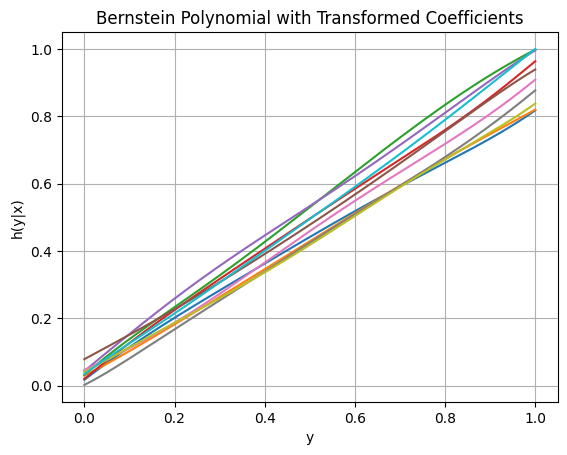

In [11]:
theta = torch.rand(10, order + 1)
theta = to_theta(theta)
visualize_bernstein_poly(theta, basis, 'Bernstein Polynomial with Transformed Coefficients')